In [34]:
from random import choice

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [35]:
# If you do nothave scikit-learn installed, uncomment the following line
# !conda install -y -c conda-forge scikit-learn

If you have issues with VSCode notebook cell outputs being truncated:

- Go to Settings (via menubar or cmd-, on Mac)
- Search for cell output settings: try @tag:notebookOutputLayout
- Adjust settings, e.g. scrolling, number of lines to display

# Workshop - ML predictions of aqueous solubility

## Introduction

In this workshop, you will get some hands on practice of applying some of the major machine learning (ML) models to a chemical dataset.

### The data

AqSolDB ([Sorkun et al.](https://doi.org/10.1038/s41597-019-0151-1)) is a curated dataset of experimentally-determined aqueous solubility values, with calculated descriptors for the molecules.

The paper gives details on how the data was acquired and processed, and its availability on a number of platforms including [github](https://github.com/mcsorkun/AqSolDB)


### The task

Prepare the data for training and evaulating a set of machine learning models to predict the solubilty of the compounds based on the features supplied (and others if you would like to calculate additional descriptors as features).

You will use scikit-learn to train and evaluate the following models:

**Supervised learning**

- Linear regression
- Logistic regression
- k-Nearest neighbors



**Unsupervised learning** 
:::{note}
There is a separate notebook for this, if we get on to it. It will not be assessed.
:::


- k-Means clustering
- PCA for dimensionality reduction

#### Steps

1. Load the data
2. Perform some EDA to gain initial understanding of the distribution of features and relationships between features, and with the target.

For each model (may require additional stages depending on the model)

3. Prepare the data 
4. Train the model
5. Make predictions
6. Evaluate performance

7. Analyse the performance of the models. Draw conclusions about the chemical problem, e.g. from the feature importances.

## Load the data and perform exploratory analysis

You can perform some initial exploratory analysis of the dataset using some of the methods you saw last week.

In addition to looking for distribution and patterns in the data, look at what the columns actually contain. Some will include metadata about the source of the observation and its processing, which will not be relevant to the target variable.

In [36]:
# TODO: 
# - Check the data and load into a DataFrame
# - Check the data types
# - Check for missing values
# - Check summary statistics
# - Identify redundant columns
data_path = 'curated-solubility-dataset.csv'  
df = pd.read_csv(data_path)

<Figure size 1500x800 with 0 Axes>

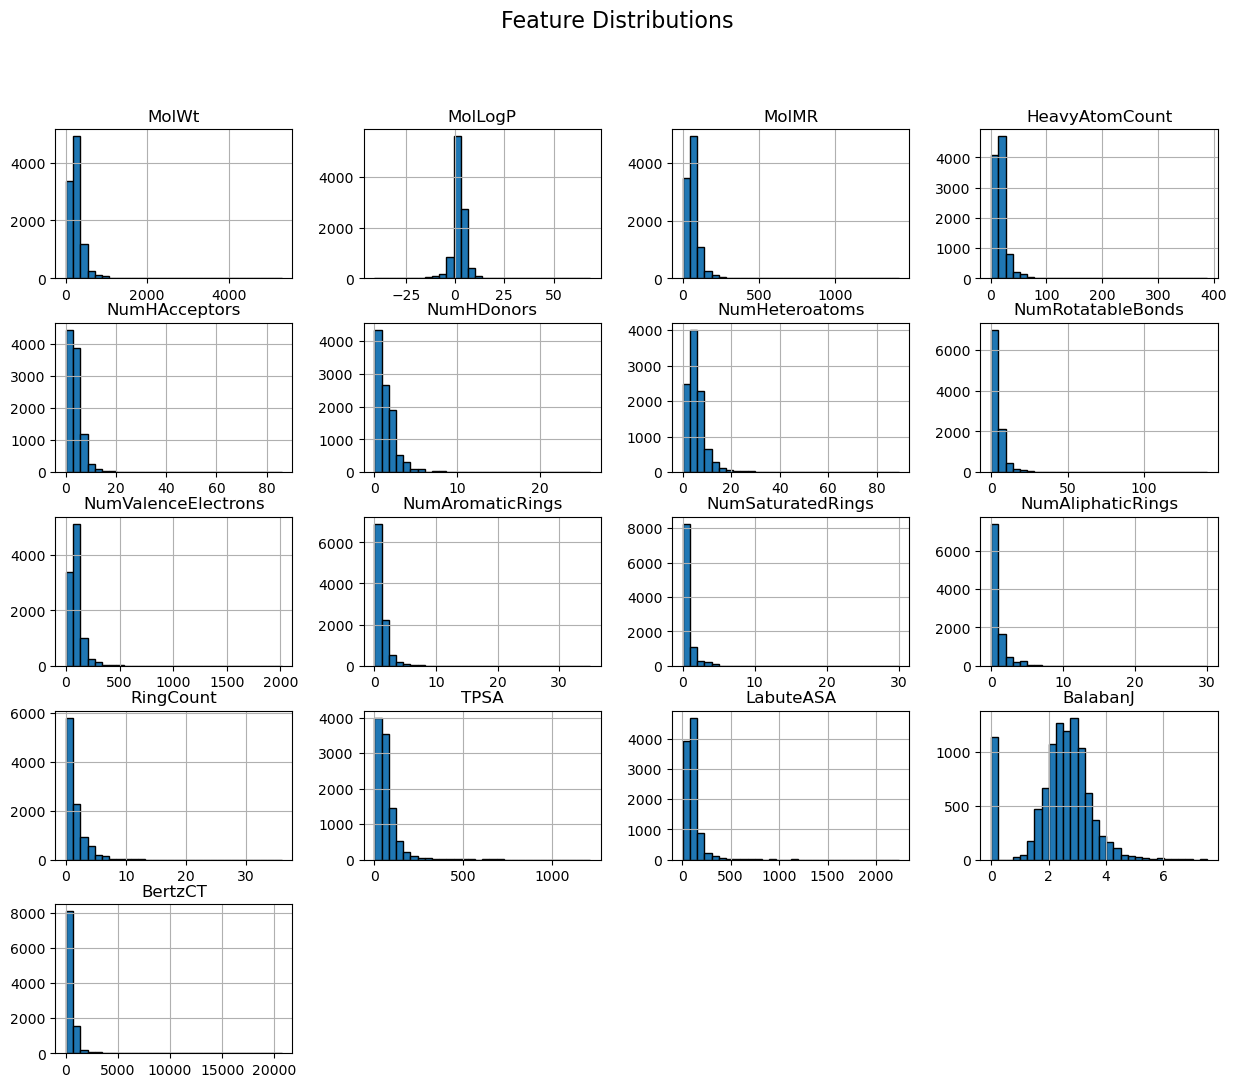

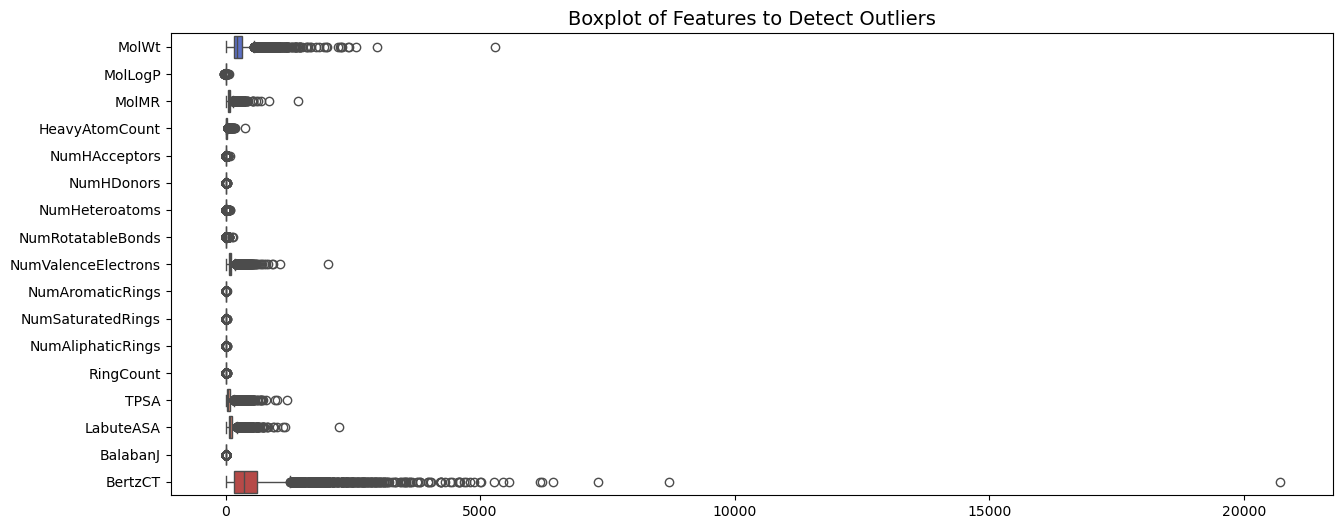

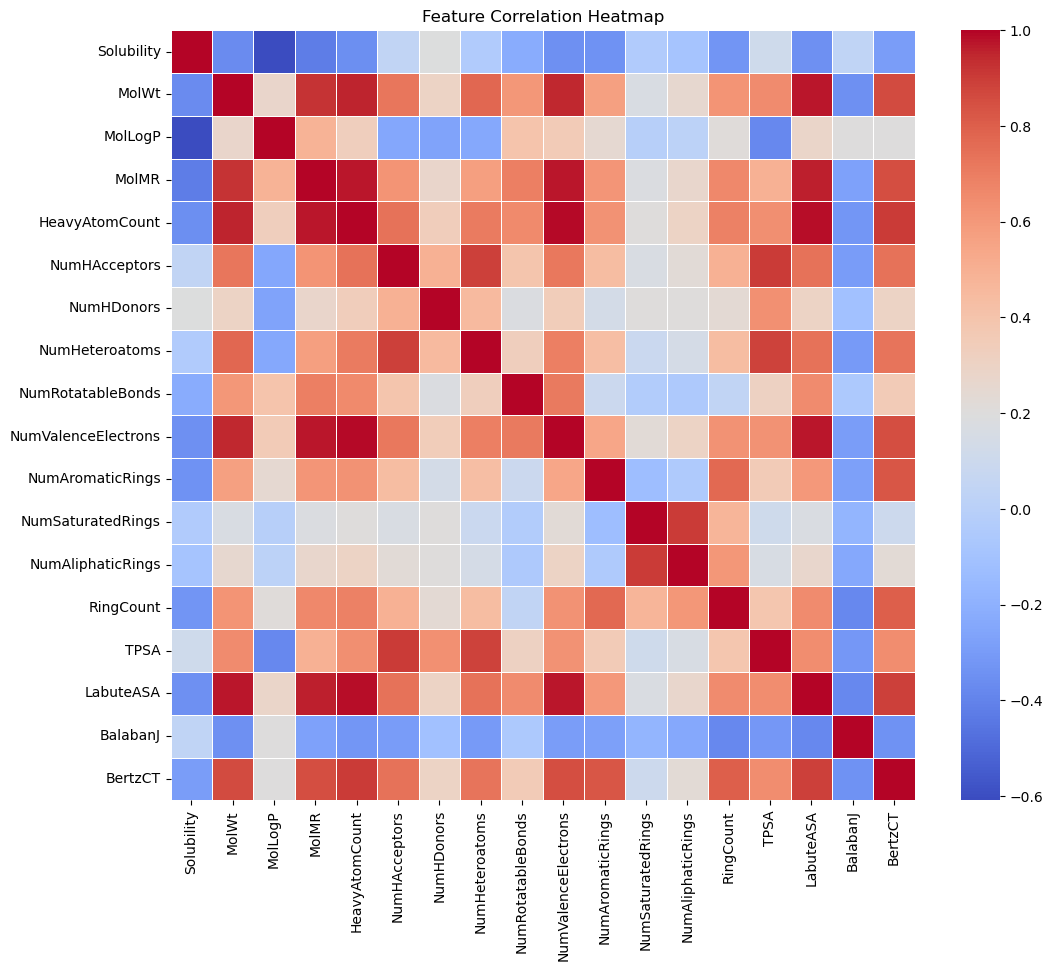

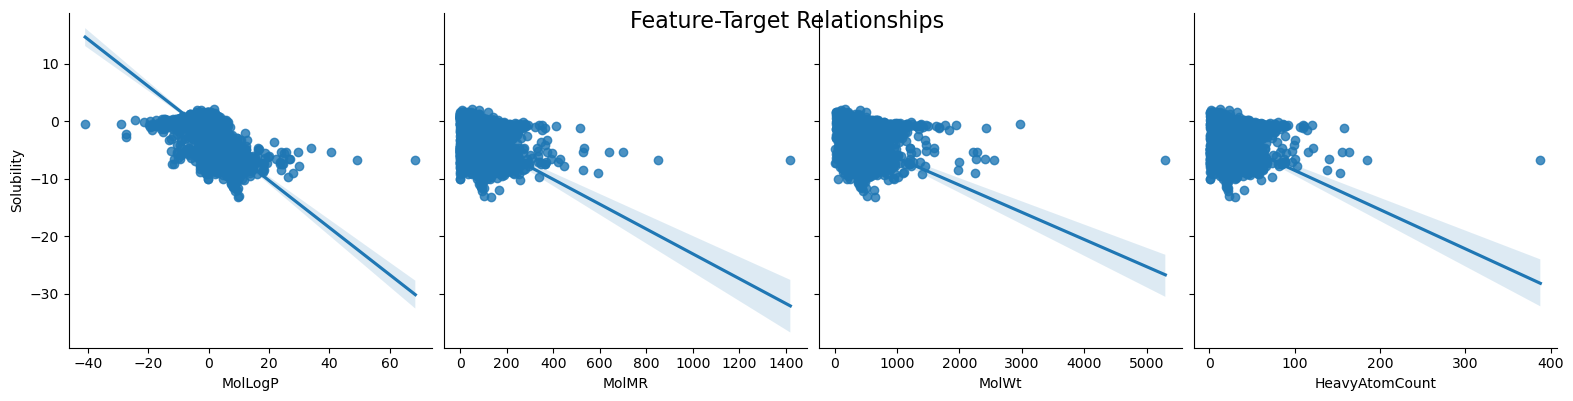

In [37]:
# TODO:
# - Visualise the data to look for distributions of features, check for outliers
# - Visualise the data to look for correlations
# - Visualise the data to look for relationships between features and target
# Re-load necessary libraries and dataset after execution state reset

# Data preprocessing (remove unnecessary columns)
columns_to_drop = ['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Group', 'SD', 'Ocurrences']
df_cleaned = df.drop(columns=columns_to_drop)

# 1. Visualizing the distribution of features and checking for outliers
plt.figure(figsize=(15, 8))
df_cleaned.drop(columns=['Solubility']).hist(figsize=(15, 12), bins=30, edgecolor='black', layout=(5, 4))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned.drop(columns=['Solubility']), orient="h", palette="coolwarm")
plt.title("Boxplot of Features to Detect Outliers", fontsize=14)
plt.show()

# 2. Visualizing feature correlations
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# 3. Visualizing relationships between features and target
# Selecting top correlated features with Solubility
top_features = correlation_matrix['Solubility'].abs().sort_values(ascending=False).index[1:5]

# Pairplot for top features
sns.pairplot(df_cleaned, x_vars=top_features, y_vars=['Solubility'], kind="reg", height=4)
plt.suptitle("Feature-Target Relationships", fontsize=16)
plt.show()


### Questions:

- Explain your approach to EDA for the dataset. What questions can this process answer and suggest how it can aid the subsequent analysis and modelling.


- What are the most significant correlations in this dataset? Discuss any strong relationships between the features and the target variable that are apparent.

I think is MolMR, because the color in hotmap to solubility is deepest.

- If you were selecting features from the data, are there any that you would remove? Explain why/why not.

Except the MolMR


#### Things to consider

- Note the distributions of values of features (e.g. the measures of centre, the magnitude and shape of the distribution and the range of the values).


## 1. Linear regression

The first model we will apply is a [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Linear regression models the relationship between input features and a continuous target variable using a linear function.

The function looks like:  

$$
y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n + \epsilon
$$

Where:  
- $ y $ = **Predicted output** (target variable)  
- $ x_1, x_2, \dots, x_n $ = **Input features** (independent variables)  
- $ w_0 $ = **Intercept** (bias term)  
- $ w_1, w_2, \dots, w_n $ = **Coefficients** (weights)  
- $ \epsilon $ = **Error term** (accounts for noise in data)  

The goal is to find weights $w_{i}$ that minimize the error, typically using Ordinary Least Squares (OLS).

It finds a best-fit line by minimising the difference between predictions and actual values, typically using least squares. 

It is widely used for trend analysis, forecasting, and understanding feature impact on outcomes.

### Prepare data

To prepare the data, create a new dataframe containing only the numerical features of the AqSolDB dataset.

#### Separate features and target

You can now separate your data into the features (the predictor variables) and target (the variable you want to predict).

In [38]:
# TODO:
# - Read the target column into a separate variable
# - Read the feature columns into a different variable - remember to drop the target column


y = df_cleaned['Solubility']

X = df_cleaned.drop(columns=['Solubility'])

# print("Feature matrix shape:", X.shape)
# print("Target vector shape:", y.shape)


#### Create the training and test sets

Run [`test_train_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create separate training and test sets, with 20% of the samples in the test set.

In [39]:
# TODO Split the data into training (80%) and testing (20%) sets
# and check the size of the resulting datasets

from sklearn.model_selection import train_test_split

# 使用 train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  
)

print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)


(7985, 17)
(1997, 17)
(7985,)
(1997,)


### Training the model

It is time to train the first ML model.

You will need to create a new LinearRegression model and train it using its `fit` method on the training data's features.

In [41]:
# TODO: Create a linear regression model

# TODO: Fit the model to the training data


from sklearn.linear_model import LinearRegression

# 1️⃣ 创建线性回归模型
linear_model = LinearRegression()

# 2️⃣ 使用训练集数据拟合模型
linear_model.fit(X_train, y_train)

# 查看训练完成后的模型参数（可选）
print("模型截距 (Intercept):", linear_model.intercept_)
print("模型系数 (Coefficients):", linear_model.coef_)


模型截距 (Intercept): -0.5317361327783625
模型系数 (Coefficients): [-0.00408561 -0.43385994  0.02425919 -0.53706293  0.15332012  0.1485645
 -0.15851268  0.05519278  0.07408043 -0.31760827  0.1725145  -0.01845872
 -0.336067   -0.00118307 -0.00967011 -0.02316262  0.00472368]


### Test the model's performance on unseen data

You can now get the model to predict the solubilities for the subset of data you withheld for the test set.

In [42]:
# TODO: Predict the solubility of the test set
y_pred = linear_model.predict(X_test)

### Evaluating the model's performance

We can visualise how closely the predicted solubility values for both the training and/or test set match the real values.

:::{hint}
You will need to also generate predictions for the test set if you want to visualise
:::

There are a variety of metrics that can be used to quantify the model's performance. 

One commonly used metric for regression tasks is $r^2$ which expresses how well the model fits the data. It ranges from 0 to 1, with 1 indicating a perfect fit.

In [62]:
# TODO: Calculate r^2 value is a measure of how well the model fits the data. It ranges from 0 to 1, 
# with 1 indicating a perfect fit.
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"R² : {r2:.4f}")



R² : 0.4895


### Questions

- What other metrics might be useful for evaluating the model's performance? Choose one other metric and calculate it for the model's perform on the test data. Briefly explain the form and meaning of the metric.
- Comment on the performance of the model on the training vs. the test data. Is there anything you can infer from the comparison?
- What information can you gain from the model coefficients? (If you want to do this, you will need to scale the features to compare them - see the [notebook](../book/3-ml_intro/ML_demo) ) How could you use this to improve model or the training process?


## 2. Logistic regression

Logistic regression is used for binary classification: predict to which of two classes an input belongs.

In the context of AqSolDB, we can convert solubility values (logS) into two classes:

Soluble (1): logS above a certain threshold (e.g., logS > -2)
Insoluble (0): logS below the threshold

This allows us to predict solubility as a classification problem.

### Prepare data

Get a copy of the dataframe after you had dropped the non-numeric features.

You will need to add a new target variable based on the current `solubility` column, where the new column value is:

`1` if `logS >= -2`  

`0` if `logS < -2`


In [47]:
from sklearn.linear_model import LogisticRegression

In [51]:
# TODO: 
# - Create a copy of the original DataFrame with numeric columns only
# - Add a new column with binary solubility values
# - Drop the original solubility column

# 1️⃣ 创建数值列数据副本
df_binary = df_cleaned.copy()

# 2️⃣ 添加二元溶解度列：Solubility >= -2 -> 1，否则 -> 0
df_binary['Solubility_Binary'] = (df_binary['Solubility'] >= -2).astype(int)

# 3️⃣ 删除原始 Solubility 列
df_binary = df_binary.drop(columns=['Solubility'])

# 查看数据以验证更改
df_binary.head()


,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Solubility_Binary
0,392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,0
1,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,0
2,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,0
3,756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666,0
4,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,0


### Separate features and target and test-train split

Follow the same process as for the linear regression and separate the target and feature columns.

Then split the data into training and testing sets. Make sure you run this with `stratify=<name of your target array>`.

In [63]:
# TODO:
# - Separate features and target column
# - Scale the features using StandardScaler
# - Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ 分离特征和目标列
X = df_knn.drop(columns=['Solubility', 'Solubility_Class'])  # 特征
y = df_knn['Solubility_Class']  # 目标变量

# 2️⃣ 使用 StandardScaler 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 返回标准化后的数组

# 3️⃣ 拆分数据集 (保持类别分布)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 检查数据集形状
print("训练集特征形状:", X_train.shape)
print("测试集特征形状:", X_test.shape)
print("训练集目标形状:", y_train.shape)
print("测试集目标形状:", y_test.shape)



训练集特征形状: (7985, 17)
测试集特征形状: (1997, 17)
训练集目标形状: (7985,)
测试集目标形状: (1997,)


In [64]:
# TODO: 
# - Create a logistic regression model
# - Fit the model to the training data
# - Predict the solubility of the test set
# - Calculate the accuracy of the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ 创建逻辑回归模型
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 2️⃣ 拟合模型到训练数据
log_reg.fit(X_train, y_train)

# 3️⃣ 使用模型预测测试集
y_pred = log_reg.predict(X_test)

# 4️⃣ 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.4f}")

# (可选) 输出分类报告和混淆矩阵，全面评估模型
print("\n分类报告:")
print(classification_report(y_test, y_pred))

print("\n混淆矩阵:")
print(confusion_matrix(y_test, y_pred))



模型准确率: 0.6410

分类报告:
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       576
           1       0.58      0.64      0.61       642
           2       0.58      0.62      0.60       568
           3       0.70      0.43      0.53       211

    accuracy                           0.64      1997
   macro avg       0.66      0.61      0.62      1997
weighted avg       0.65      0.64      0.64      1997


混淆矩阵:
[[423 122  21  10]
 [ 91 413 133   5]
 [ 26 165 354  23]
 [  1  17 103  90]]


The [`classification report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a set of metrics for classification tasks.

### Questions

- Briefly explain the meaning of the metrics in the classification report.
- Comment on the performance of the regression and classification models. Why might this approach be useful for some types of problems?

## k-NN clasification

Over to you for this one. Here is the documentation for sklearn's [`KNeighboursClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

The process follows a very similar process to the models you have already seen.

You can either stick with the binary classification or use the classes described in the AqSolDB paper:


| Category | logS range |
|------------|----------|
|**Highly soluble** | logS > 0 |
|**Soluble** | 0 > logS > -2 |
|**Slightly soluble**  | -2 > logS > -4 |
|**Insoluble** | logS < -4 |


There are a few important points:

1. You must scale the features using StandardScaler
2. Make sure you use `stratify` and pass it the full target array
3. k-NN has a hyperparameter, so you will need to use cross-validation to adjust the value of k. There is a quick tutorial [here](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)

Devise your evaluation strategy for the k-NN model - 

For example:

- classification report 
- confusion matrix

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


def categorize_solubility(value):
    if value > 0:
        return 3  # Highly soluble
    elif value > -2:
        return 2  # Soluble
    elif value > -4:
        return 1  # Slightly soluble
    else:
        return 0  # Insoluble

df_knn = df_cleaned.copy()
df_knn['Solubility_Class'] = df_knn['Solubility'].apply(categorize_solubility)
X = df_knn.drop(columns=['Solubility', 'Solubility_Class'])
y = df_knn['Solubility_Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {'n_neighbors': range(3, 11)}  # 尝试 k=3 到 k=10
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print(f"最佳 k 值: {grid_search.best_params_['n_neighbors']}")

y_pred = best_knn.predict(X_test)
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=["Insoluble", "Slightly soluble", "Soluble", "Highly soluble"]))

print(confusion_matrix(y_test, y_pred))

最佳 k 值: 10

分类报告:
                  precision    recall  f1-score   support

       Insoluble       0.76      0.84      0.79       576
Slightly soluble       0.64      0.67      0.66       642
         Soluble       0.65      0.60      0.62       568
  Highly soluble       0.69      0.55      0.61       211

        accuracy                           0.69      1997
       macro avg       0.68      0.66      0.67      1997
    weighted avg       0.68      0.69      0.68      1997


混淆矩阵:
[[482  74  10  10]
 [109 430  98   5]
 [ 39 152 339  38]
 [  8  12  74 117]]
